In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
bookings = pd.read_csv("fact_aggregated_bookings.csv")
df=pd.read_csv('final_bookings_cleaned.csv')
hotels = pd.read_csv("dim_hotels.csv")

In [17]:
prop_id=bookings.groupby('property_id').agg({'successful_bookings':'sum','capacity':'sum'}).reset_index()
prop_id = prop_id.merge(hotels, on='property_id', how='left')
prop_id2=df.groupby('property_id').agg({'revenue_generated' : 'sum', 'revenue_realized' : 'sum'}).reset_index()
prop_id2['revenue_leaked']=prop_id2['revenue_generated']-prop_id2['revenue_realized']
prop_id = prop_id.merge(prop_id2, on='property_id', how='left')
prop_id['RevPAR_generated']=prop_id2['revenue_generated']/prop_id['capacity']
prop_id['RevPAR_realized']=prop_id2['revenue_realized']/prop_id['capacity']
prop_id['ADR_generated']=prop_id2['revenue_generated']/prop_id['successful_bookings']
prop_id['ADR_realized']=prop_id2['revenue_realized']/prop_id['successful_bookings']
prop_id['Occupancy Rate']=(prop_id['successful_bookings']/prop_id['capacity'])*100
prop_id['Revenue loss%']=((prop_id2['revenue_generated']-prop_id2['revenue_realized'])/prop_id2['revenue_generated'])*100
prop_id_ben = prop_id[prop_id['city'] == 'Bangalore'].reset_index()

prop_id_delhi



,index,property_id,successful_bookings,capacity,property_name,category,city,revenue_generated,revenue_realized,revenue_leaked,RevPAR_generated,RevPAR_realized,ADR_generated,ADR_realized,Occupancy Rate,Revenue loss%
0,19,19558,4371,9844,Atliq Grands,Luxury,Bangalore,60619950,51717330,8902620,6158.060748,5253.690573,13868.668497,11831.921757,44.402682,14.685957
1,20,19559,4705,8740,Atliq Exotica,Luxury,Bangalore,66446175,56854065,9592110,7602.537185,6505.041762,14122.460149,12083.754516,53.832952,14.435910
2,21,19560,5979,9108,Atliq City,Business,Bangalore,95131800,79913475,15218325,10444.861660,8773.987154,15910.988460,13365.692423,65.645586,15.997096
3,22,19561,5736,10764,Atliq Blu,Luxury,Bangalore,81036900,69002370,12034530,7528.511706,6410.476589,14127.771967,12029.701883,53.288740,14.850679
4,23,19562,5812,8832,Atliq Bay,Luxury,Bangalore,91463475,78075345,13388130,10355.918818,8840.052649,15737.005334,13433.472987,65.806159,14.637679
5,24,19563,5413,10120,Atliq Palace,Business,Bangalore,78932250,66865365,12066885,7799.629447,6607.249506,14581.978570,12352.736930,53.488142,15.287649


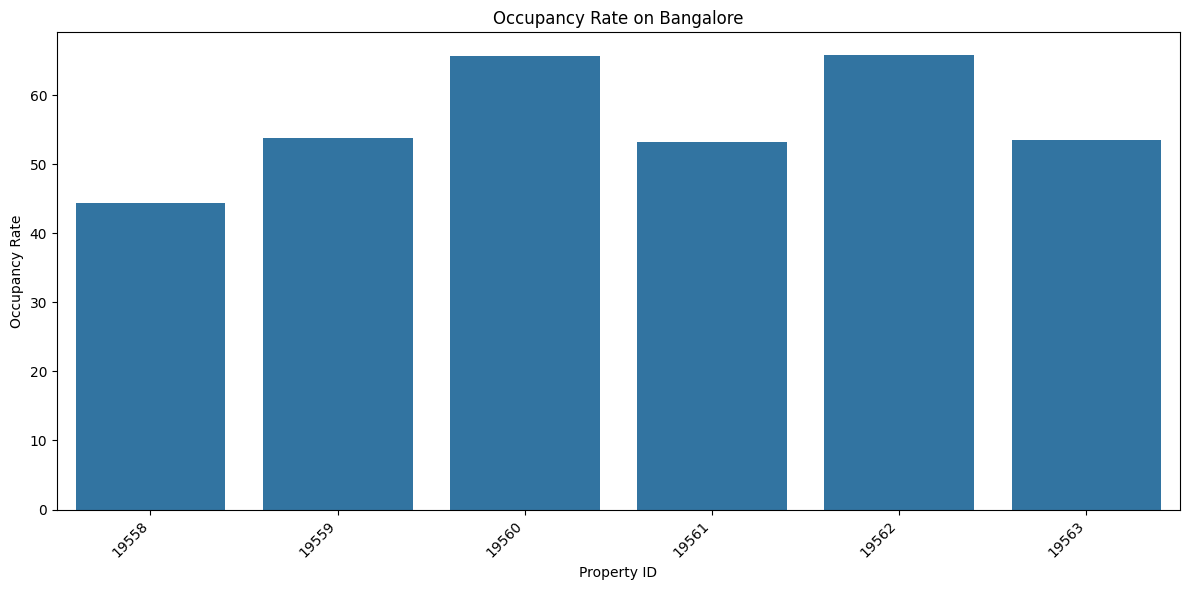

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=prop_id_delhi, x='property_id', y='Occupancy Rate')
plt.xticks(rotation=45, ha='right')
plt.title('Occupancy Rate on Bangalore')
plt.xlabel('Property ID')
plt.ylabel('Occupancy Rate')
plt.tight_layout()
plt.show()

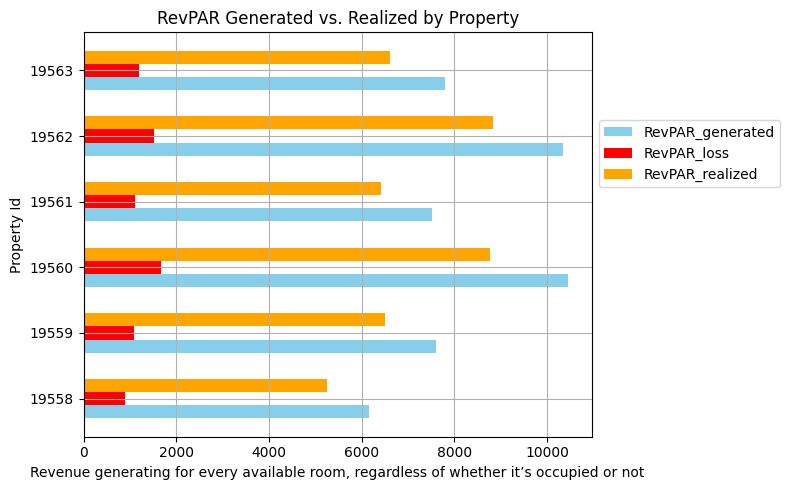

In [12]:
y = np.arange(len(prop_id_delhi['property_id']))  
bar_height = 0.20  
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(y - bar_height,prop_id_delhi['RevPAR_generated'] , height=bar_height, label='RevPAR_generated', color='skyblue')
ax.barh(y ,(prop_id_delhi['RevPAR_generated']-prop_id_delhi['RevPAR_realized']) , height=bar_height, label='RevPAR_loss', color='red')
ax.barh(y + bar_height, prop_id_delhi['RevPAR_realized'], height=bar_height, label='RevPAR_realized', color='orange')

# Set y-ticks and labels
ax.set_yticks(y)
ax.set_yticklabels(prop_id_delhi['property_id'])

# Add labels, title, and legend
ax.set_xlabel('Revenue generating for every available room, regardless of whether it’s occupied or not')
ax.set_ylabel('Property Id')
ax.set_title('RevPAR Generated vs. Realized by Property')
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.grid(True)
plt.tight_layout()
plt.show()

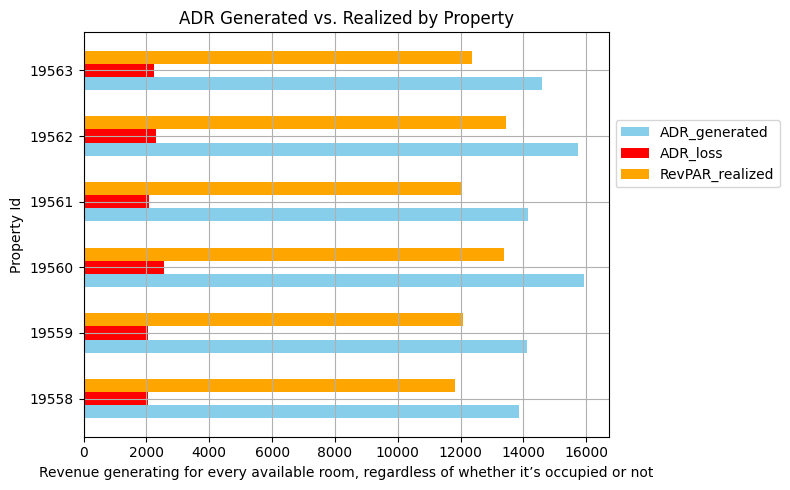

In [13]:
y = np.arange(len(prop_id_delhi['property_id']))  
bar_height = 0.20  
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(y - bar_height,prop_id_delhi['ADR_generated'] , height=bar_height, label='ADR_generated', color='skyblue')
ax.barh(y ,(prop_id_delhi['ADR_generated']-prop_id_delhi['ADR_realized']) , height=bar_height, label='ADR_loss', color='red')
ax.barh(y + bar_height, prop_id_delhi['ADR_realized'], height=bar_height, label='RevPAR_realized', color='orange')

# Set y-ticks and labels
ax.set_yticks(y)
ax.set_yticklabels(prop_id_delhi['property_id'])

# Add labels, title, and legend
ax.set_xlabel('Revenue generating for every available room, regardless of whether it’s occupied or not')
ax.set_ylabel('Property Id')
ax.set_title('ADR Generated vs. Realized by Property')
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.grid(True)
plt.tight_layout()
plt.show()

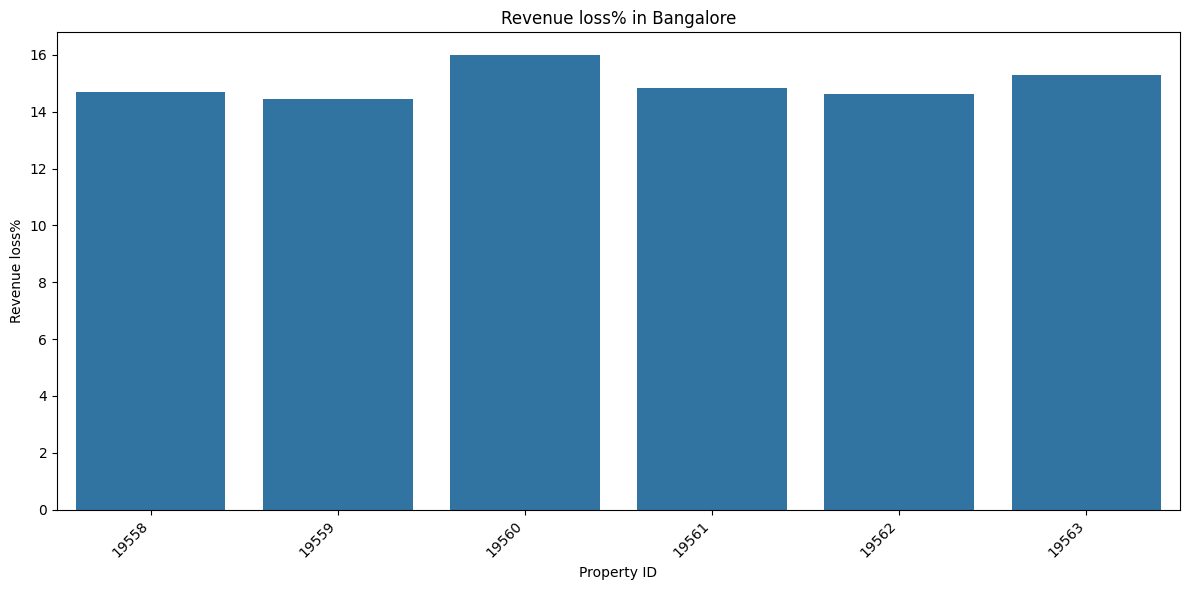

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=prop_id_delhi, x='property_id', y='Revenue loss%')
plt.xticks(rotation=45, ha='right')
plt.title('Revenue loss% in Bangalore')
plt.xlabel('Property ID')
plt.ylabel('Revenue loss%')
plt.tight_layout()
plt.show()

In [20]:
group_col = 'booking_platform'  
df_ban = df[df['city'] == 'Bangalore']
booking_partners = df_ban.groupby(group_col)['booking_status'].value_counts().unstack().reset_index()
booking_partners['Conversion Rate']=(booking_partners['Checked Out']/(booking_partners['Checked Out']+booking_partners['No Show']+booking_partners['Cancelled']))*100
booking_partners

booking_status,booking_platform,Cancelled,Checked Out,No Show,Conversion Rate
0,direct offline,373,1111,77,71.172325
1,direct online,747,2217,150,71.194605
2,journey,442,1304,85,71.217914
3,logtrip,828,2326,161,70.165913
4,makeyourtrip,1545,4138,297,69.197324
5,others,3151,8804,676,69.701528
6,tripster,566,1532,112,69.321267


In [26]:
df['check_in_date'] = pd.to_datetime(df['check_in_date'])
df['checkout_date'] = pd.to_datetime(df['checkout_date'])
df['booking_date'] = pd.to_datetime(df['booking_date'])

In [27]:
bengaluru_cancelled = df[(df['city'] == 'Bangalore') & (df['booking_status'] == 'Cancelled')]

bengaluru_cancelled['Lead_Time'] =((bengaluru_cancelled['check_in_date']-bengaluru_cancelled['booking_date']).dt.days)
def categorize_lead_time(days):
    if days == 0: return 'Same Day'
    elif days <= 3: return '1-3 Days'
    elif days <= 14: return '4-14 Days'
    else: return '15+ Days'
bengaluru_cancelled['Categorize'] = bengaluru_cancelled['Lead_Time'].apply(categorize_lead_time)

C:\Users\ayush\AppData\Local\Temp\ipykernel_24980\1209700619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bengaluru_cancelled['Lead_Time'] =((bengaluru_cancelled['check_in_date']-bengaluru_cancelled['booking_date']).dt.days)
C:\Users\ayush\AppData\Local\Temp\ipykernel_24980\1209700619.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bengaluru_cancelled['Categorize'] = bengaluru_cancelled['Lead_Time'].apply(categorize_lead_time)


Categorize  property_id  1-3 Days  15+ Days  4-14 Days  Same Day
0                 19558       507        52        424        46
1                 19559       504        51        470        56
2                 19560       763        47        171       557
3                 19561       619        83        552        69
4                 19562       656        80        545        61
5                 19563       634        31        140       534


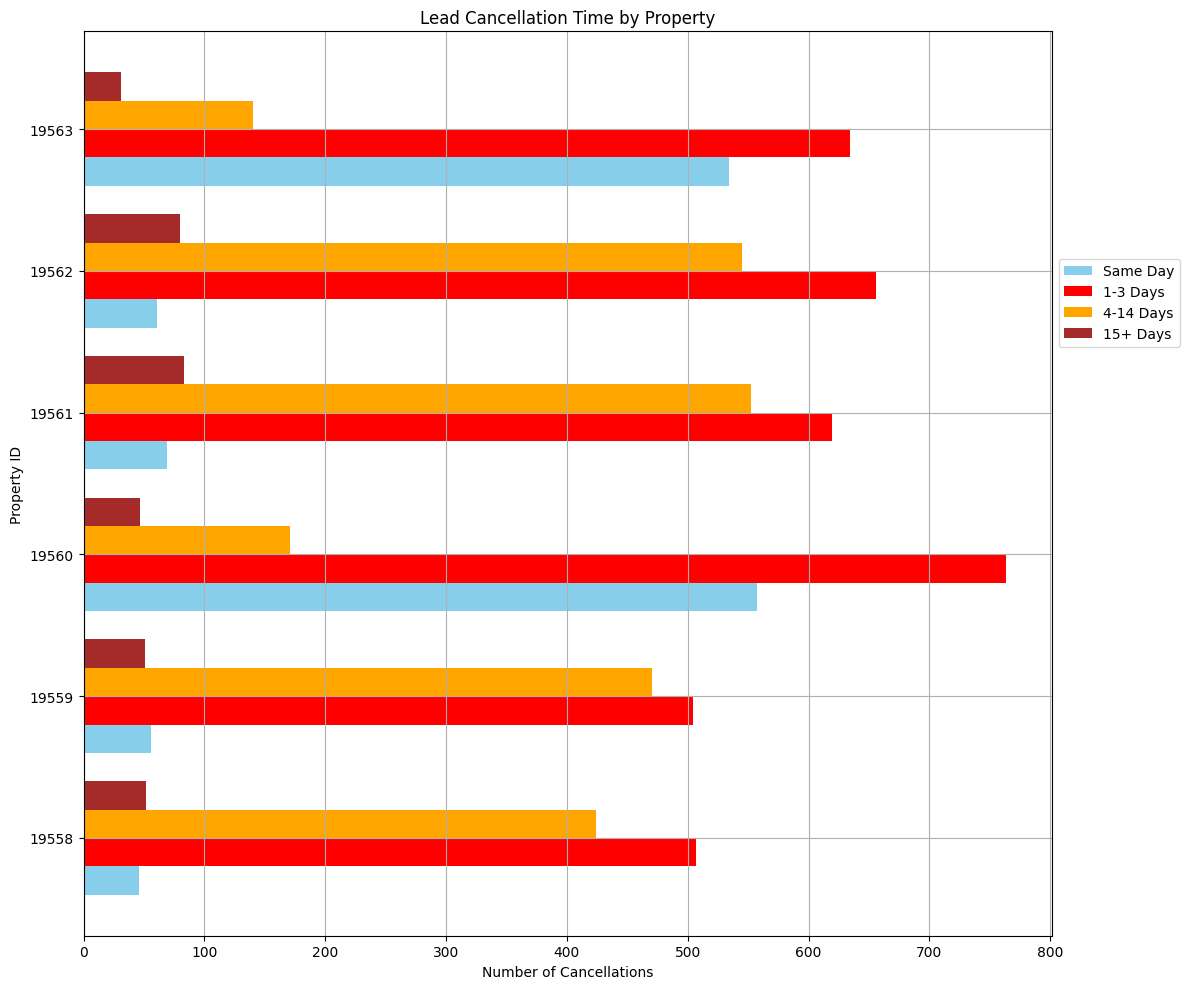

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Group and Pivot
bengaluru_cancelled_prop = bengaluru_cancelled.groupby(['property_id', 'Categorize']).size().unstack(fill_value=0)

# Step 2: Ensure all four categories are present as columns
for category in ['Same Day', '1-3 Days', '4-14 Days', '15+ Days']:
    if category not in bengaluru_cancelled_prop.columns:
        bengaluru_cancelled_prop[category] = 0

# Step 3: Reset index
bengaluru_cancelled_prop = bengaluru_cancelled_prop.reset_index()
print(bengaluru_cancelled_prop)
# Step 4: Plot
y = np.arange(len(bengaluru_cancelled_prop['property_id']))  
bar_height = 0.20  
fig, ax = plt.subplots(figsize=(12, 10))

ax.barh(y - (1.5*bar_height), bengaluru_cancelled_prop['Same Day'], height=bar_height, label='Same Day', color='skyblue')
ax.barh(y - (0.5*bar_height), bengaluru_cancelled_prop['1-3 Days'], height=bar_height, label='1-3 Days', color='red')
ax.barh(y + (0.5*bar_height), bengaluru_cancelled_prop['4-14 Days'], height=bar_height, label='4-14 Days', color='orange')
ax.barh(y + (1.5*bar_height), bengaluru_cancelled_prop['15+ Days'], height=bar_height, label='15+ Days', color='brown')

# Set y-ticks and labels
ax.set_yticks(y)
ax.set_yticklabels(bengaluru_cancelled_prop['property_id'])

# Add labels, title, and legend
ax.set_xlabel('Number of Cancellations')
ax.set_ylabel('Property ID')
ax.set_title('Lead Cancellation Time by Property')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
bookings = pd.read_csv('final_bookings_cleaned.csv')

# Create revenue_loss column if missing
if 'revenue_loss' not in bookings.columns:
    bookings['revenue_loss'] = bookings['revenue_generated'] - bookings['revenue_realized']

# Filter for Bangalore
bangalore_bookings = bookings[bookings['city'] == 'Bangalore']

# --- Overall Bangalore Cancellation Rate ---
total_bangalore_bookings = len(bangalore_bookings)
bangalore_cancellations = bangalore_bookings[bangalore_bookings['booking_status'] != 'Checked Out']
total_bangalore_cancellations = len(bangalore_cancellations)
bangalore_cancellation_rate = (total_bangalore_cancellations / total_bangalore_bookings) * 100

print(f"Total Bookings from Bangalore: {total_bangalore_bookings}")
print(f"Cancelled Bookings from Bangalore: {total_bangalore_cancellations}")
print(f"Bangalore Cancellation Rate: {bangalore_cancellation_rate:.2f}%\n")

# --- Bangalore Cancellation Rate by Platform ---
platform_summary = (
    bangalore_bookings
    .groupby('booking_platform', observed=True)
    .apply(lambda g: pd.Series({
        'Total Bookings': len(g),
        'Cancellations': (g['booking_status'] != 'Checked Out').sum(),
        'Cancellation Rate (%)': (g['booking_status'] != 'Checked Out').mean() * 100
    }))
    .sort_values('Cancellation Rate (%)', ascending=False)
)

print("Bangalore Cancellation Rate by Platform:")
print(platform_summary)

# --- Bangalore Cancellation Rate by Property ---
property_summary = (
    bangalore_bookings
    .groupby('property_name', observed=True)
    .apply(lambda g: pd.Series({
        'Total Bookings': len(g),
        'Cancellations': (g['booking_status'] != 'Checked Out').sum(),
        'Cancellation Rate (%)': (g['booking_status'] != 'Checked Out').mean() * 100
    }))
    .sort_values('Cancellation Rate (%)', ascending=False)
)

print("\nBangalore Cancellation Rate by Property:")
print(property_summary)

# --- Bangalore Cancellation Rate by Room Type ---
room_summary = (
    bangalore_bookings
    .groupby('room_type', observed=True)
    .apply(lambda g: pd.Series({
        'Total Bookings': len(g),
        'Cancellations': (g['booking_status'] != 'Checked Out').sum(),
        'Cancellation Rate (%)': (g['booking_status'] != 'Checked Out').mean() * 100
    }))
    .sort_values('Cancellation Rate (%)', ascending=False)
)

print("\nBangalore Cancellation Rate by Room Type:")
print(room_summary)


Total Bookings from Bangalore: 30642
Cancelled Bookings from Bangalore: 9210
Bangalore Cancellation Rate: 30.06%

Bangalore Cancellation Rate by Platform:
                  Total Bookings  Cancellations  Cancellation Rate (%)
booking_platform                                                      
makeyourtrip              5980.0         1842.0              30.802676
tripster                  2210.0          678.0              30.678733
others                   12631.0         3827.0              30.298472
logtrip                   3315.0          989.0              29.834087
direct offline            1561.0          450.0              28.827675
direct online             3114.0          897.0              28.805395
journey                   1831.0          527.0              28.782086

Bangalore Cancellation Rate by Property:
               Total Bookings  Cancellations  Cancellation Rate (%)
property_name                                                      
Atliq City             5836.

C:\Users\ayush\AppData\Local\Temp\ipykernel_24980\3389543392.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({
C:\Users\ayush\AppData\Local\Temp\ipykernel_24980\3389543392.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({
C:\Users\ayush\AppData\Local\Temp\ipykernel_24980\3389543392.py:59: FutureWarning: DataFrameGroupBy.apply operated on the grouping col

In [30]:
import pandas as pd

# Assuming 'bookings' DataFrame is already loaded and contains the necessary data
# If not, load your data first: bookings = pd.read_csv('your_data.csv')

# Filter for Bangalore bookings
bangalore_bookings = bookings[bookings['city'] == 'Bangalore']

# Filter only cancelled bookings in Bangalore
bangalore_cancellations = bangalore_bookings[bangalore_bookings['booking_status'] != 'Checked Out']

# Number of cancellations per property
property_cancellation_counts = bangalore_cancellations['property_name'].value_counts()

# Total number of Bangalore cancellations
total_bangalore_cancellations = len(bangalore_cancellations)  # Use len() instead of shape[0]

# Calculate % share
property_cancellation_percentage = (property_cancellation_counts / total_bangalore_cancellations) * 100

# Combine into DataFrame
bangalore_property_cancellation_share = pd.DataFrame({
    'Number of Cancellations': property_cancellation_counts,
    'Percentage of Bangalore Cancellations': property_cancellation_percentage
})

# Sort by number of cancellations
bangalore_property_cancellation_share = bangalore_property_cancellation_share.sort_values(
    by='Number of Cancellations', 
    ascending=False
)

# Display the results

bangalore_property_cancellation_share


,Number of Cancellations,Percentage of Bangalore Cancellations
property_name,,
Atliq City,1799,19.533116
Atliq Blu,1628,17.676439
Atliq Bay,1628,17.676439
Atliq Palace,1615,17.535288
Atliq Exotica,1290,14.006515
Atliq Grands,1250,13.572204


Bangalore Monthly Cancellation Trends:
   mmm yy  Total Bookings  Cancellations  Cancellation Rate (%)
0  Jul 22            9285           2798              30.134626
1  Jun 22           10592           3170              29.928248
2  May 22           10765           3242              30.116117


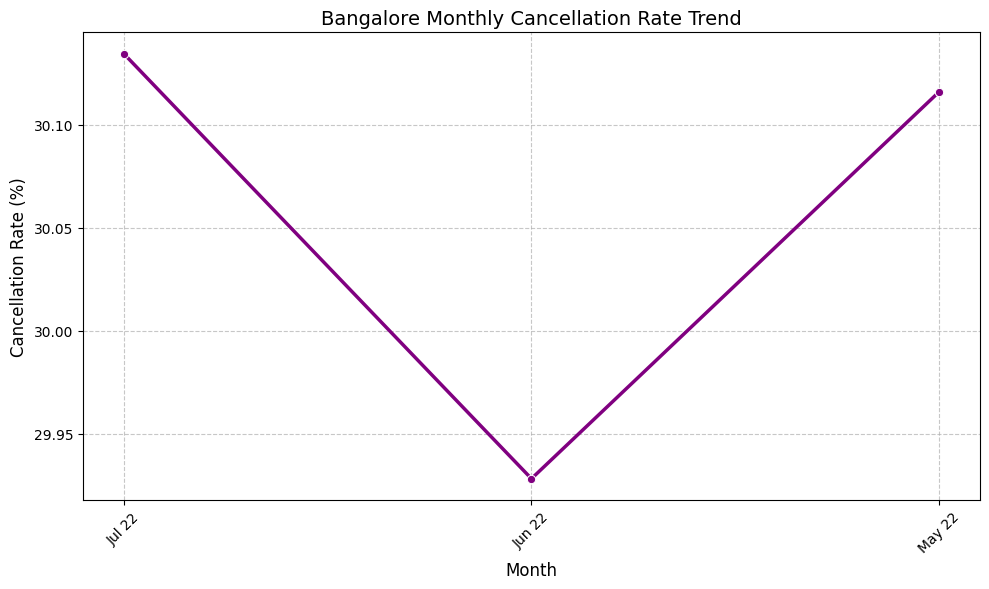

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace with your actual data loading code)
# bookings = pd.read_csv('your_data_file.csv')

# Filter for Bangalore bookings
bangalore_bookings = bookings[bookings['city'] == 'Bangalore']

# Monthly total bookings
bangalore_monthly_total = bangalore_bookings.groupby('mmm yy').size()

# Monthly cancellations
bangalore_monthly_cancellations = bangalore_bookings[bangalore_bookings['booking_status'] != 'Checked Out'].groupby('mmm yy').size()

# Combine into one DataFrame
bangalore_monthly_trend = pd.DataFrame({
    'Total Bookings': bangalore_monthly_total,
    'Cancellations': bangalore_monthly_cancellations
})

# Fill NaN with 0 for months with no cancellations
bangalore_monthly_trend.fillna(0, inplace=True)

# Calculate cancellation rate per month
bangalore_monthly_trend['Cancellation Rate (%)'] = (bangalore_monthly_trend['Cancellations'] / bangalore_monthly_trend['Total Bookings']) * 100

# Reset index for plotting
bangalore_monthly_trend.reset_index(inplace=True)

# View the results
print("Bangalore Monthly Cancellation Trends:")
print(bangalore_monthly_trend)

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='mmm yy', y='Cancellation Rate (%)', data=bangalore_monthly_trend, 
             marker='o', color='purple', linewidth=2.5)
plt.xticks(rotation=45)
plt.title('Bangalore Monthly Cancellation Rate Trend', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate peak points
max_rate = bangalore_monthly_trend['Cancellation Rate (%)'].max()
max_month = bangalore_monthly_trend


Bangalore Weekly Cancellation Trends:
   week no  Total Bookings  Cancellations  Cancellation Rate (%)
0     W 19            2622            750              28.604119
1     W 20            2436            723              29.679803
2     W 21            2370            709              29.915612
3     W 22            2399            763              31.804919
4     W 23            2323            714              30.736117
5     W 24            2624            813              30.983232
6     W 25            2390            706              29.539749
7     W 26            2385            709              29.727463
8     W 27            2563            763              29.769801
9     W 28            2571            783              30.455076
10    W 29            2334            690              29.562982
11    W 30            2018            635              31.466799
12    W 31            1545            435              28.155340
13    W 32              62             17           

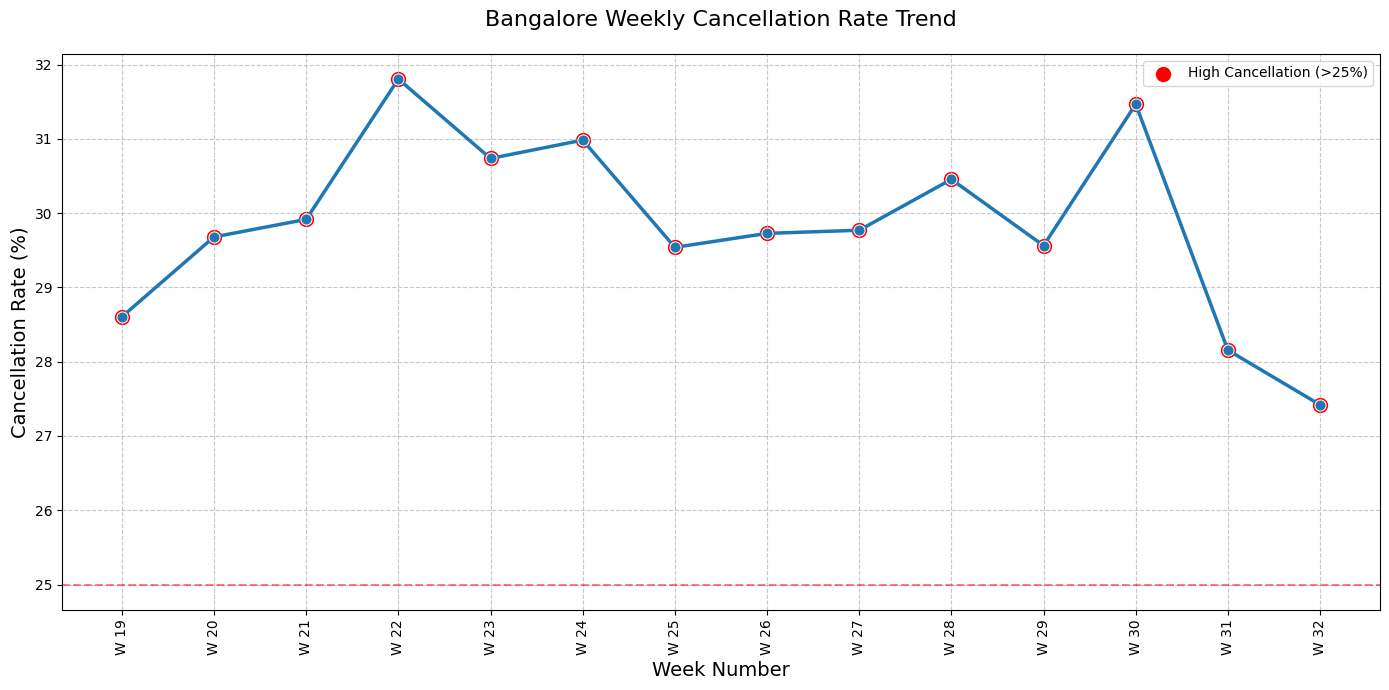

In [32]:
# Step 6B: Week-wise Bangalore Cancellations

# Filter for Bangalore bookings
bangalore_bookings = bookings[bookings['city'] == 'Bangalore']

# Group total bookings per week
bangalore_weekly_total = bangalore_bookings.groupby('week no').size()

# Group cancellations per week
bangalore_weekly_cancellations = bangalore_bookings[bangalore_bookings['booking_status'] != 'Checked Out'].groupby('week no').size()

# Combine into DataFrame
bangalore_weekly_trend = pd.DataFrame({
    'Total Bookings': bangalore_weekly_total,
    'Cancellations': bangalore_weekly_cancellations
})

# Handle missing values and calculate cancellation rate
bangalore_weekly_trend.fillna(0, inplace=True)
bangalore_weekly_trend['Cancellation Rate (%)'] = (bangalore_weekly_trend['Cancellations'] / 
                                                  bangalore_weekly_trend['Total Bookings']) * 100
bangalore_weekly_trend.reset_index(inplace=True)

# Display results
print("Bangalore Weekly Cancellation Trends:")
print(bangalore_weekly_trend)

# Plot with enhancements
plt.figure(figsize=(14, 7))
sns.lineplot(x='week no', y='Cancellation Rate (%)', data=bangalore_weekly_trend, 
             marker='o', color='#1f77b4', linewidth=2.5, markersize=8)

# Highlight weeks with cancellation rate > 25%
high_cancel_weeks = bangalore_weekly_trend[bangalore_weekly_trend['Cancellation Rate (%)'] > 25]
if not high_cancel_weeks.empty:
    plt.scatter(x=high_cancel_weeks['week no'], 
                y=high_cancel_weeks['Cancellation Rate (%)'], 
                color='red', s=100, label='High Cancellation (>25%)')

plt.xticks(rotation=90)
plt.title('Bangalore Weekly Cancellation Rate Trend', fontsize=16, pad=20)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.xlabel('Week Number', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=25, color='r', linestyle='--', alpha=0.5)  # Threshold line
plt.legend()
plt.tight_layout()
plt.show()



In [33]:
# Filter Bangalore bookings
bangalore_bookings = bookings[bookings['city'] == 'Bangalore']

# Calculate total revenue generated and realized for Bangalore
bangalore_revenue_generated = bangalore_bookings['revenue_generated'].sum()
bangalore_revenue_realized = bangalore_bookings['revenue_realized'].sum()

# Total revenue loss from Bangalore
bangalore_revenue_loss = bangalore_revenue_generated - bangalore_revenue_realized

# Bangalore revenue leakage percentage
bangalore_leakage_percent = (bangalore_revenue_loss / bangalore_revenue_generated) * 100

print(f"Total Revenue Generated from Bangalore: ₹{bangalore_revenue_generated:,}")
print(f"Total Revenue Realized from Bangalore: ₹{bangalore_revenue_realized:,}")
print(f"Total Revenue Lost from Bangalore: ₹{bangalore_revenue_loss:,}")
print(f"Bangalore Revenue Leakage Percentage: {bangalore_leakage_percent:.2f}%")


Total Revenue Generated from Bangalore: ₹473,630,550
Total Revenue Realized from Bangalore: ₹402,427,950
Total Revenue Lost from Bangalore: ₹71,202,600
Bangalore Revenue Leakage Percentage: 15.03%


Bangalore Monthly Revenue Leakage Analysis:
mmm yy  revenue_generated  revenue_realized  revenue_loss  leakage_percent
Jul 22          143704050         121756875      21947175        15.272482
Jun 22          163581225         139143885      24437340        14.938964
May 22          166345275         141527190      24818085        14.919621


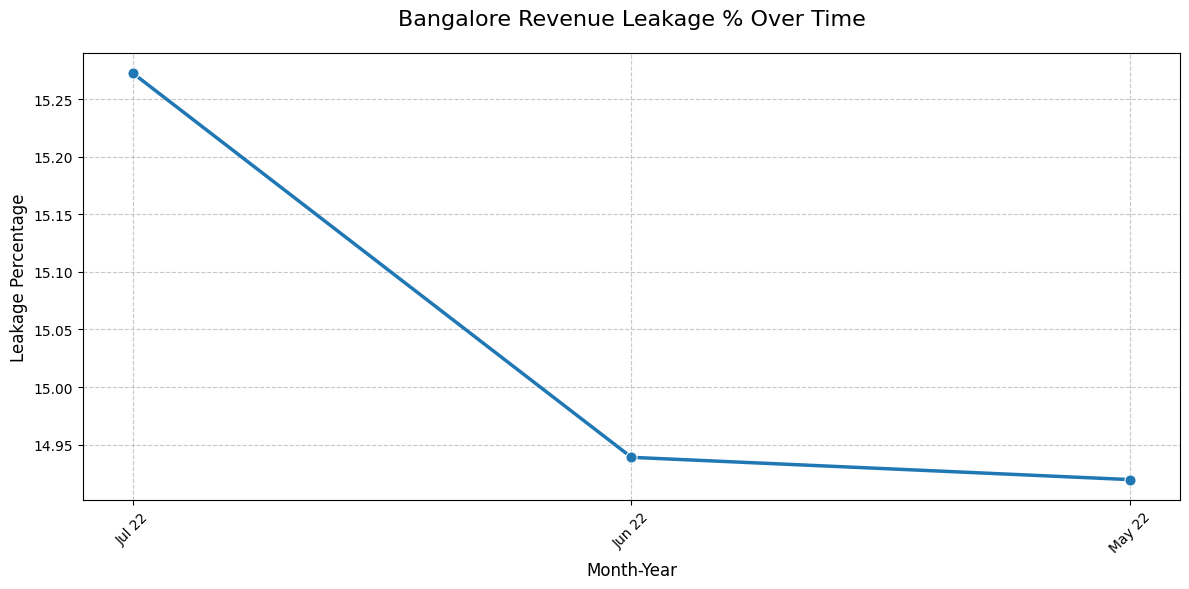

In [34]:
# Group Bangalore bookings by Month ("mmm yy") 
bangalore_time_revenue = bangalore_bookings.groupby('mmm yy').agg({
    'revenue_generated': 'sum',
    'revenue_realized': 'sum'
}).reset_index()

# Calculate revenue loss and % leakage
bangalore_time_revenue['revenue_loss'] = (
    bangalore_time_revenue['revenue_generated'] - 
    bangalore_time_revenue['revenue_realized']
)

bangalore_time_revenue['leakage_percent'] = (
    bangalore_time_revenue['revenue_loss'] / 
    bangalore_time_revenue['revenue_generated']
) * 100

# Display the data
print("Bangalore Monthly Revenue Leakage Analysis:")
print(bangalore_time_revenue.to_string(index=False))

# Visualize with enhanced line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=bangalore_time_revenue, x='mmm yy', y='leakage_percent', 
             marker='o', color='#1f77b4', linewidth=2.5, markersize=8)

# Formatting
plt.title('Bangalore Revenue Leakage % Over Time', fontsize=16, pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Leakage Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Highlight peak leakage months
max_leakage = bangalore_time_revenue['leakage_percent'].max()
max_month = bangalore_time_revenue.loc[bangalore_time_revenue['leakage_percent'].idxmax(), 'mmm yy']


plt.tight_layout()
plt.show()


In [35]:
df=pd.read_csv('final_bookings_cleaned.csv')
df_bangalore = df[df['city'] == 'Bangalore']

In [37]:
import pandas as pd

# Load the dataset (make sure the file path is correct)
bookings = pd.read_csv('final_bookings_cleaned.csv')

# Filter for Bangalore bookings
df_bangalore = bookings[bookings['city'] == 'Bangalore'].copy()

# Calculate sum of revenue_generated and revenue_realized
bangalore_revenue_sums = df_bangalore[['revenue_generated', 'revenue_realized']].sum()

# Calculate revenue loss column
df_bangalore['revenue_loss'] = df_bangalore['revenue_generated'] - df_bangalore['revenue_realized']

# Calculate revenue loss percentage
revenue_loss_pct = df_bangalore['revenue_loss'].sum() / df_bangalore['revenue_generated'].sum() * 100

# Print revenue loss percentage
print(f"Bangalore Revenue Loss %: {revenue_loss_pct:.2f}%")

# Show the DataFrame head (for preview)
df_bangalore.head()


Bangalore Revenue Loss %: 15.03%


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,room_type,mmm yy,week no,day_type,revenue_loss
216,May012219558RT27,19558,2022-05-01,2022-05-01,2022-05-07,2,RT2,others,NaN,No Show,13500,13500,Atliq Grands,Luxury,Bangalore,Elite,May 22,W 19,weekend,0
217,May012219558RT28,19558,2022-05-01,2022-05-01,2022-05-03,2,RT2,makeyourtrip,NaN,Cancelled,13500,5400,Atliq Grands,Luxury,Bangalore,Elite,May 22,W 19,weekend,8100
218,May012219558RT219,19558,2022-05-01,2022-05-01,2022-05-04,1,RT2,makeyourtrip,3.0,Checked Out,13500,13500,Atliq Grands,Luxury,Bangalore,Elite,May 22,W 19,weekend,0
219,May012219558RT31,19558,2022-05-01,2022-05-01,2022-05-02,2,RT3,direct online,NaN,Checked Out,18000,18000,Atliq Grands,Luxury,Bangalore,Premium,May 22,W 19,weekend,0
220,May012219559RT27,19559,2022-05-01,2022-05-01,2022-05-05,2,RT2,others,NaN,Cancelled,13500,5400,Atliq Exotica,Luxury,Bangalore,Elite,May 22,W 19,weekend,8100
